In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit as nk
import plotly.graph_objects as go
#from ipywidgets import interactive, HBox, VBox
import plotly.offline as py

import pandas as pd

In [2]:
# Make figures a bit bigger
%pylab inline
pylab.rcParams['figure.figsize'] = (40.0, 30.0)  

Populating the interactive namespace from numpy and matplotlib


C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
# Import data
ecg_fmri=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11.txt')
ecg_clean=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11_clean.txt')
ecg_mock=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/mockExperiment/mockExp_sangfroisPart2.txt')

In [5]:
ecg_fmri_preproc=nk.ecg_preprocess(ecg_fmri, sampling_rate=5000, filter_type="FIR", filter_band="bandpass", 
                                   filter_frequency=[3, 17], filter_order=0.3, segmenter="pekkanen")
ecg_mock_preproc=nk.ecg_preprocess(ecg_mock, sampling_rate=10000, filter_type="FIR", filter_band="bandpass", 
                                   filter_frequency=[3, 17], filter_order=0.3, segmenter="pekkanen")

In [177]:
ecg_fmri_preproc['df'].keys() # raw and filtered signal

ecg_target_df=ecg_fmri_preproc['ECG'] # extracted peaks and waveforms

ecg_target_mock_df=ecg_mock_preproc['ECG']

rpeaks=ecg_target_df['R_Peaks']



In [9]:
ecg_target_df.keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends'])

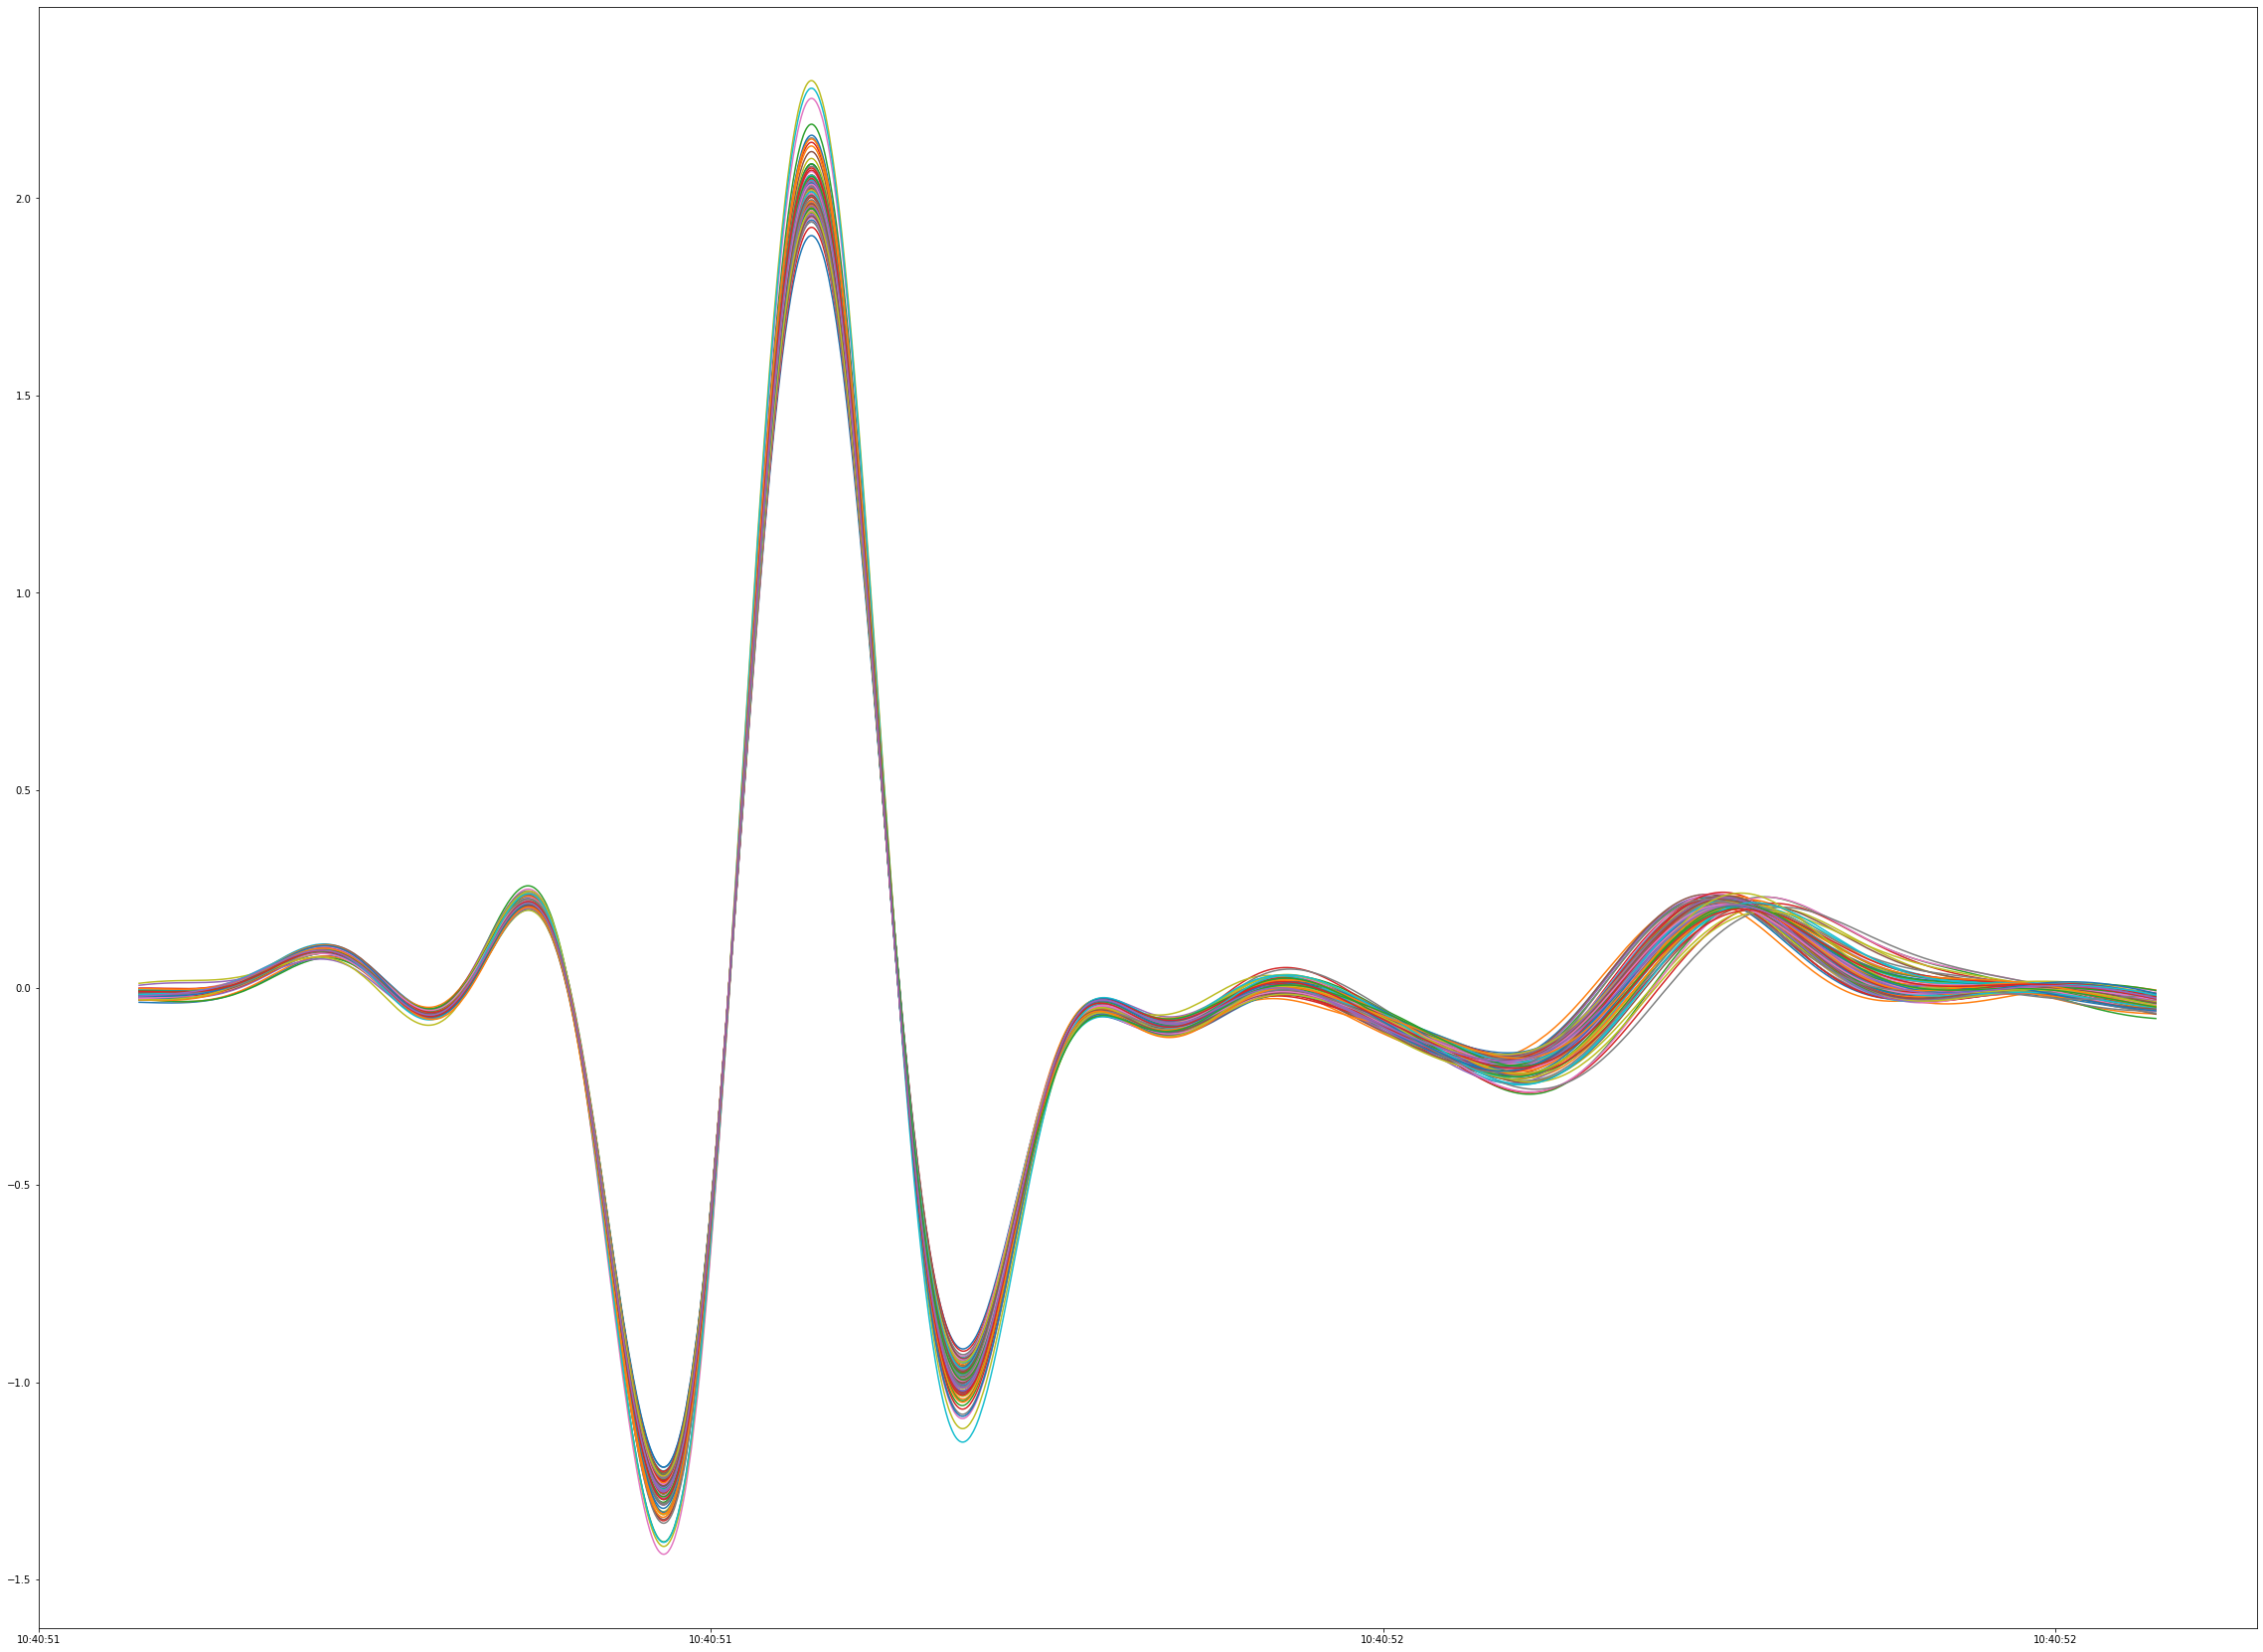

In [179]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cardiac_cycles_mock=ecg_target_mock_df['Cardiac_Cycles']

cardiac_cycles_fmri=ecg_target_df['Cardiac_Cycles']
plt.plot(cardiac_cycles_mock)

In [ ]:
cardiac_cycles_inv = cardiac_cycles_fmri.transpose()
mean_cc = np.mean(cardiac_cycles_inv)
plt.plot(mean_cc)

In [176]:
a=np.sort(sem(cardiac_cycles_fmri, axis=))
plt.plot(a)

IndexError: tuple index out of range

## Visualization with dash-plotly

In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_plotly_dash import JupyterDash


In [182]:
import pandas as pd
import plotly.graph_objs as go


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=0,
        max=len(cardiac_cycles_fmri.columns),
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
            y=list(cardiac_cycles_fmri[:][selected_nb_observation]),
            opacity=0.7,
            name='cardiac-cycle-waveform'
        )

    fig = go.Figure(data=[trace])
    fig.add_trace(go.Scatter(x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
            y=list(np.average(cardiac_cycles_fmri[:].T[0:selected_nb_observation], axis=0)),
                    mode='lines',
                    name='average'))
    #fig.add_trace(go.Scatter(x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
     #       y=list(sem(cardiac_cycles_fmri[:].T[0:selected_nb_observation], axis=0)),
      #              mode='lines',
       #             name='sem'))
    return fig 
        

app

In [244]:
import pandas as pd
import plotly.graph_objs as go


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=0,
        max=len(cardiac_cycles_fmri.columns),
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,3000,len(cardiac_cycles_fmri))),
            y=list(cardiac_cycles_fmri[:][selected_nb_observation]),
            opacity=0.7,
            name='cardiac-cycle-waveform'
        )

    fig = go.Figure(data=[trace])
    fig.add_trace(go.Scatter(x=list(np.linspace(0,3000,len(cardiac_cycles_fmri))),
            y=list(np.average(cardiac_cycles_fmri[:].T[0:selected_nb_observation], axis=0)),
                    mode='lines',
                    name='average cardiac cycle waveform'))
    #fig.add_trace(go.Scatter(x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
     #       y=list(sem(cardiac_cycles_fmri[:].T[0:selected_nb_observation], axis=0)),
      #              mode='lines',
       #             name='sem'))
    return fig 
        

app

In [19]:
import pandas as pd
import plotly.graph_objs as go
from scipy.stats import sem


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=1,
        max=len(cardiac_cycles_fmri.columns),
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
            y=list(sem(cardiac_cycles_fmri[:].T[0:selected_nb_observation], axis=0)),
            opacity=0.7
        )

    fig = go.Figure(data=[trace])
    
    return fig 
        

app

In [243]:
#for i in range len(cardiac_cycles_fmri)
len(cardiac_cycles_fmri.columns)
my_sort=np.sort(cardiac_cycles_fmri,axis=1)

pd.DataFrame(my_sort)

my_sort[[1,2,3]]
#plt.plot(my_sort)

array([[-2.33740039e-01, -1.94896787e-01, -1.90566252e-01,
        -1.82510985e-01, -1.79409436e-01, -1.75001488e-01,
        -1.71363735e-01, -1.64497288e-01, -1.64402599e-01,
        -1.63403581e-01, -1.63227010e-01, -1.60645932e-01,
        -1.56321537e-01, -1.56283018e-01, -1.56153894e-01,
        -1.46074996e-01, -1.39441004e-01, -1.26199798e-01,
        -1.14292052e-01, -1.13077699e-01, -1.05338957e-01,
        -1.04857289e-01, -1.03223608e-01, -1.01579120e-01,
        -9.66183686e-02, -9.40904427e-02, -9.38580305e-02,
        -9.33403049e-02, -9.27962552e-02, -8.89952229e-02,
        -8.73139554e-02, -8.55019235e-02, -8.47729203e-02,
        -8.43078798e-02, -8.18803326e-02, -8.12470882e-02,
        -7.98774526e-02, -7.89024806e-02, -6.81744519e-02,
        -6.54787129e-02, -6.46565418e-02, -6.44785946e-02,
        -6.34570213e-02, -5.74793169e-02, -5.67267924e-02,
        -5.62215283e-02, -5.53598164e-02, -5.38811259e-02,
        -5.19761770e-02, -5.11775596e-02, -5.05250131e-0

In [ ]:
trace = go.Line(
            x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
            y=list(cardiac_cycles_fmri[:][1]),
            opacity=0.7
        )

In [ ]:
traces = []
for i in range(200):
    traces.append(go.Line(
            x=list(np.linspace(0,2,len(cardiac_cycles_fmri))),
            y=list(cardiac_cycles_fmri[:][i]),
            opacity=0.9
        ))

fig = go.Figure(data=traces)


fig.show()